# 2 Numerical Algebra

## 2.1 Intro to Numerical Root Finding

The golden rule of numerical analysis: We compute only when everything else fails.

In this chapter we want to solve equations using a computer. The goal of equation solving is to find the value of the independent variable which makes the equation true. These are the sorts of equations that you learned to solve in high school algebra and Pre-Calculus. For a very simple example, solve for $ x $ if $ x + 5 = 2x - 3 $. Or for another example, the equation $ x^2 + x = 2x - 7 $ is an equation that could be solved with the quadratic formula. As another example, the equation $ \sin(x) = \frac{\sqrt{2}}{2} $ is an equation which can be solved using some knowledge of trigonometry. The topic of Numerical Root Finding really boils down to approximating the solutions to equations without using all of the by-hand techniques that you learned in high school. The downside to everything that we’re about to do is that our answers are only ever going to be approximations. To see a video introduction to this chapter go to [this link](https://youtu.be/W2yL9IVmv2A).

The fact that we will only ever get approximate answers begs the question: why would we want to do numerical algebra if by-hand techniques exist? The answers are relatively simple:

1. By-hand algebra is often very challenging, quite time-consuming, and error-prone. You will find that the numerical techniques are quite elegant, work very quickly, and require very little overhead to actually implement and verify.
2. Most equations do not lend themselves to by-hand solutions. The techniques that we know from high school algebra solve common, and often quite simplified, problems but when equations arise naturally they are often not nice.

Let’s first take a look at equations in a more abstract way. Consider the equation  
$\ell(x) = r(x)$ where $\ell(x)$ and $r(x)$ stand for left-hand and right-hand expressions respectively. To begin solving this equation we can first rewrite it by subtracting the right-hand side from the left to get  
$$\ell(x) − r(x) = 0.$$

Hence, we can define a function $f(x)$ as $f(x) = \ell(x) − r(x)$ and observe that *every* equation can be written as:  
$$\text{If } f(x) = 0, \text{find } x.$$

This gives us a common language for which to frame all of our numerical algorithms.

For example, if we want to solve the equation  
$$3 \sin(x) + 9 = x^2 − \cos(x)$$ 
then this is the same as solving  
$$(3 \sin(x) + 9) − (x^2 − \cos(x)) = 0.$$ 
We illustrate this idea in Figure 2.1. You should pause and notice that there is no way that you are going to apply by-hand techniques from algebra to solve this equation … an approximate answer is pretty much our only hope.

**Figure 2.1: A Typical Root Finding Problem**

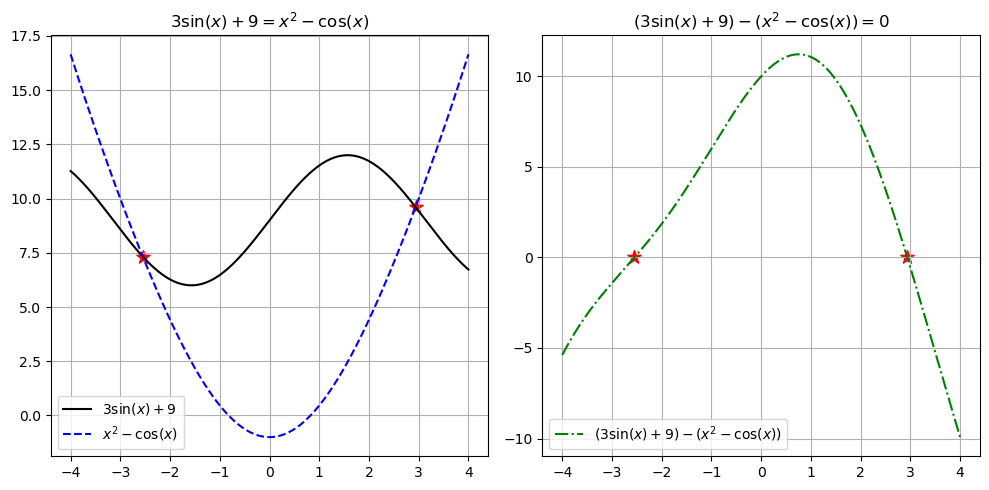

In [1]:
from Chapter_2_Figures import create_figure_2_1
create_figure_2_1()

On the left-hand side of Figure 2.1 we see the solutions to the equation $3\sin(x) + 9 = x^2 - \cos(x)$, and on the right-hand side we see the solutions to the equation

$$
(3\sin(x) + 9) - (x^2 - \cos(x)) = 0.
$$

From the plots it is apparent that the two equations have the same solutions: $x_1 \approx -2.55$ and $x_2 \approx 2.88$. Figure 2.1 should demonstrate what we mean when we say that solving equations of the form $\ell(x) = r(x)$ will give the same answer as solving $f(x) = 0$. Pause for a moment and closely examine the plots to verify this for yourself.

We now have one way to view every equation-solving problem. As we’ll see in this chapter, if $f(x)$ has certain properties then different numerical techniques for solving the equation will apply – and some will be much faster and more accurate than others. The following sections give several different techniques for solving equations of the form $f(x) = 0$. We will start with the simplest techniques to implement and then move to the more powerful techniques that require some ideas from Calculus to understand and analyze. Throughout this chapter we will also work to quantify the amount of error that we make while using these techniques.


## 2.2 The Bisection Method

---

## 2.2.1 Intuition and Implementation

### Exercise 2.1  
A friend tells you that she is thinking of a number between 1 and 100. She will allow you multiple guesses with some feedback for where the mystery number falls. How do you systematically go about guessing the mystery number? Is there an optimal strategy?

For example, the conversation might go like this:

**Sally:** I’m thinking of a number between 1 and 100  
**Joe:** Is it 35?  
**Sally:** No, but the number is between 35 and 100  
**Joe:** Is it 99?  
**Sally:** No, but the number is between 35 and 99  
…

---


### Exercise 2.2  
Now let’s say that Sally has a continuous function that has a root somewhere between  $x = 2$
and  $x = 10.$ Modify your strategy from the number guessing game in the previous problem to narrow down where the root is.

---



### Exercise 2.3  
Was it necessary to say that Sally’s function was continuous? Could your technique work if the function were not continuous?

---



Now let’s get to the math. We’ll start the mathematical discussion with a theorem from Calculus.

### Theorem 2.1 (The Intermediate Value Theorem (IVT))  
If  $f(x)$ is a continuous function on the closed interval $[a,b]$ and $y^*$ lies between $f(a)$ and $f(b)$ then there exists some point $x^* \in [a,b]$ such that $f(x^*) = y^*$.

---



### Exercise 2.4 

Draw a picture of what the intermediate value theorem says graphically.

---



### Exercise 2.5  
If  $y^* = 0$ the Intermediate Value Theorem gives us important information about solving equations. What does it tell us?

---



### Corollary 2.1  
If  $f(x)$ is a continuous function on the closed interval  $[a, b]$ and if $f(a)$ and $f(b)$ have opposite signs, then from the Intermediate Value Theorem, we know that there exists some point  $x^* \in [a, b]$
such that $\underline{\hspace{1in}}$.

---



### Exercise 2.6  

Fill in the blank in the previous corollary and then draw several pictures that indicate why this might be true for continuous functions.

---



### The Intermediate Value Theorem and Its Application  

The Intermediate Value Theorem (IVT) and its corollary are **existence theorems** in the sense that they tell us that some point exists. The annoying thing about mathematical existence theorems is that they typically don’t tell us **how** to find the point that is guaranteed to exist – *annoying*. The method that you developed in **Exercises 2.1 and 2.2** gives one possible way to find the root.

In **Exercises 2.1 and 2.2**, you likely came up with an algorithm such as this:

1. Say we know that the root of a continuous function lies between $x=a$ and $x=b$.
2. Guess that the root is at the midpoint $m = \frac{a + b}{2}$.
3. By using the signs of the function, narrow the interval that contains the root to either $[a,m]$ or $[m,b]$.
4. **Repeat**.

Now we will turn this optimal strategy into **computer code** that will simply play the game for us. But first, we need to pay careful attention to some of the mathematical details.

---



### Exercise 2.7  
Where is the Intermediate Value Theorem used in the root-guessing strategy?

---



### Exercise 2.8  
Why was it important that the function $f(x)$ is continuous when playing this root-guessing game? Provide a few sketches to demonstrate your answer.

---

### Exercise 2.9 (The Bisection Method) 

**Goal:** We want to solve the equation $ f(x) = 0 $ for $ x $ assuming that the solution $ x^* $ is in the interval $[a, b]$.

**The Algorithm:**  Assume that $ f(x) $ is continuous on the closed interval $[a, b]$. To make approximations of the solutions to the equation $ f(x) = 0 $, do the following:

1. **Check to see if** $ f(a) $ **and** $ f(b) $ **have opposite signs.** You can do this by taking the product of $ f(a) $ and $ f(b) $.
   - If $ f(a) $ and $ f(b) $ have different signs then what does the IVT tell you?
   - If $ f(a) $ and $ f(b) $ have the same sign then what does the IVT not tell you? What should you do in this case?
   - Why does the product of $ f(a) $ and $ f(b) $ tell us something about the signs of the two numbers?

2. **Compute the midpoint of the closed interval**, $ m = \frac{a+b}{2} $, and evaluate $ f(m) $.
   - Will $ m $ always be a better guess of the root than $ a $ or $ b $? Why?
   - What should you do here if $ f(m) $ is really close to zero?

3. **Compare the signs of** $ f(a) $ **vs** $ f(m) $ **and** $ f(b) $ **vs** $ f(m) $.
   - What do you do if $ f(a) $ and $ f(m) $ have opposite signs?
   - What do you do if $ f(m) $ and $ f(b) $ have opposite signs?

4. **Repeat steps 2 and 3 and stop when** $ f(m) $ **is close enough to zero.**

---


### Exercise 2.10 

Draw a picture illustrating what the Bisection Method does to approximate the solutions to the equation $f(x)=0.$

---

### Exercise 2.11

We want to write a Python function for the Bisection Method. Instead of jumping straight into the code we should **ALWAYS** write pseudo-code first. It is often helpful to write pseudo-code as comments in your file. Use the template below to complete your pseudo-code.

```python
def Bisection(f , a , b , tol):
    # The input parameters are

    # f is a Python function or a Lambda function
    # a is the lower guess
    # b is the upper guess
    # tol is an optional tolerance for the accuracy of the root

    # if the user doesn't define a tolerance we need
    # code to create a default

    # check that there is a root between a and b
    # if not we should return an error and break the code

    # next calculate the midpoint $m = \frac{a+b}{2}$
    
    # start a while loop
    #   # in the while loop we need an if statement
    #   # if ...
    #   # elif ...
    #   # elif ...

    #   # we should check that the while loop isn't running away

    # end the while loop
    # define and return the root
```

---

### Exercise 2.12 

Now use the pseudo-code as structure to complete a function for the Bisection Method. Also write test code that verifies that your function works properly. Be sure that it can take a Lambda Function as an input along with an initial lower bound, an initial upper bound, and an optional error tolerance. The output should be only 1 single number: the root.


In [ ]:
def Bisection(f, a, b, tol = 1e-6):
    if f(a)*f(b) > 0:
        print('The function has the same sign at the endpoints')
        return None
    
    while abs(a-b) > tol:
        m = (a+b)/2
        if f(m) == 0:
            return m
        elif f(a)*f(m) < 0:
            b = m
        else:
            a = m
    return m

### Exercise 2.13
 
Test your Bisection Method code on the following equations.

a. $x^2 - 2 = 0$ on $x \in [0,2]$

b. $\sin(x) + x^2 = 2\ln(x) + 5$ on $x \in [0,5]$ (be careful! make a plot first)

c. $(5 - x)e^x = 5$ on $x \in [0,5]$

---

### 2.2.2 Analysis

After we build any root finding algorithm we need to stop and think about how it will perform on new problems. The questions that we typically have for a root-finding algorithm are:

- Will the algorithm always converge to a solution?
- How fast will the algorithm converge to a solution?
- Are there any pitfalls that we should be aware of when using the algorithm?

---

### Exercise 2.14. 

**Discussion:** What must be true in order to use the bisection method?

---


### Exercise 2.15. 

**Discussion:** Does the bisection method work if the Intermediate Value Theorem does not apply? (Hint: what does it mean for the IVT to "not apply?")

---

### Exercise 2.16. 

If there is a root of a continuous function $f(x)$ between $x=a$ and $x=b$ will the bisection method always be able to find it? Why / why not?

---



Next we'll focus on a deeper mathematical analysis that will allow us to determine exactly how fast the bisection method actually converges to within a pre-set tolerance. Work through the next problem to develop a formula that tells you exactly how many steps the bisection method needs to take in order to stop.

---

### Exercise 2.17. 

Let $f(x)$ be a continuous function on the interval $[a, b]$ and assume that $f(a) \cdot f(b)<0$. A reoccurring theme in Numerical Analysis is to approximate some mathematical thing to within some tolerance. For example, if we want to approximate the solution to the equation $f(x)=0$ to within $\varepsilon$ with the bisection method, we should be able to figure out how many steps it will take to achieve that goal.

1. Let's say that $a=3$ and $b=8$ and $f(a) \cdot f(b)<0$ for some continuous function $f(x)$. The width of this interval is 5 , so if we guess that the root is $m=(3+8) / 2=5.5$ then our error is less than $5 / 2$. In the more general setting, if there is a root of a continuous function in the interval $[a, b]$ then how far off could the midpoint approximation of the root be? In other words, what is the error in using $m=(a+b) / 2$ as the approximation of the root?

2. The bisection method cuts the width of the interval down to a smaller size at every step. As such, the approximation error gets smaller at every step. Fill in the blanks in the following table to see the pattern in how the approximation error changes with each iteration.

| Iteration | Width of Interval | Approximation Error |
| :--- | :--- | :--- |
| 0 | $\|b-a\|$ | $\frac{\|b-a\|}{2}$ |
| 1 | $\frac{\|b-a\|}{2}$ |  |
| 2 | $\frac{\|b-a\|}{2^{2}}$ | $\vdots$ |
| $\vdots$ | $\vdots$ |  |
| $n$ | $\frac{\|b-a\|}{2^{n}}$ |  |

3. Now to the key question: If we want to approximate the solution to the equation $f(x)=0$ to within some tolerance $\varepsilon$ then how many iterations of the bisection method do we need to take?
Hint: Set the $n^{\text {th }}$ approximation error from the table equal to $\varepsilon$. What should you solve for from there?

---



In Exercise 2.17 you actually proved the following theorem.

### Theorem 2.2. (Convergence Rate of the Bisection Method)

If $f(x)$ is a continuous function with a root in the interval $[a, b]$ and if the bisection method
is performed to find the root then:

- The error between the actual root and the approximate root will decrease by a factor of 2 at every iteration.
- If we want the approximate root found by the bisection method to be within a tolerance of $\varepsilon$ then

$$
\frac{|b-a|}{2^{n+1}}=\varepsilon
$$

where $n$ is the number of iterations that it takes to achieve that tolerance.

- Solving for the number of iterations ( $n$ ) we get

$$
n=\log _{2}\left(\frac{|b-a|}{\varepsilon}\right)-1
$$

- Rounding the value of $n$ up to the nearest integer gives the number of iterations necessary to approximate the root to a precision less than $\varepsilon$.



### Exercise 2.18. 

Is it possible for a given function and a given interval that the Bisection Method converges to the root in fewer steps than what you just found in the previous problem? Explain.

---


### Exercise 2.19. 

Create a second version of your Python Bisection Method function that uses a for loop that takes the optimal number of steps to approximate the root to within some tolerance. This should be in contrast to your first version which likely used a while loop to decide when to stop. Is there an advantage to using one of these version of the Bisection Method over the other?

---


The final type of analysis that we should do on the bisection method is to make plots of the error between the approximate solution that the bisection method gives you and the exact solution to the equation. This is a bit of a funny thing! Stop and think about this for a second: if you know the exact solution to the equation then why are you solving it numerically in the first place!?!? However, whenever you build an algorithm you need to test it on problems where you actually do know the answer so that you can can be somewhat sure that it isn't giving you nonsense. Furthermore, analysis like this tells us how fast the algorithm is expected to perform.

From Theorem 2.2 you know that the bisection method cuts the interval in half at every iteration. You proved in Exercise 2.17 that the error given by the bisection method is therefore cut in half at every iteration as well. The following example demonstrate this theorem graphically.

### Example 2.1. 

Let's solve the very simple equation $x^{2}-2=0$ for $x$ to get the solution $x=\sqrt{2}$ with the bisection method. Since we know the exact answer we can compare the exact answer to the value of the midpoint given at each iteration and calculate an absolute error:

$$
\text { Absolute Error }=\mid \text { Approximate Solution }- \text { Exact Solution } \mid .
$$

1. If we plot the absolute error on the vertical axis and the iteration number on the horizontal axis we get Figure 2.2. As expected, the absolute error follows an exponentially decreasing trend. Notice that it isn't a completely smooth curve since we will have some jumps in the accuracy just due to the fact that sometimes the root will be near the midpoint of the interval and sometimes it won't be.

**Figure 2.2: The evolution of the absolute error when solving the equation $x^{2}-2=0$ with the bisection method.**


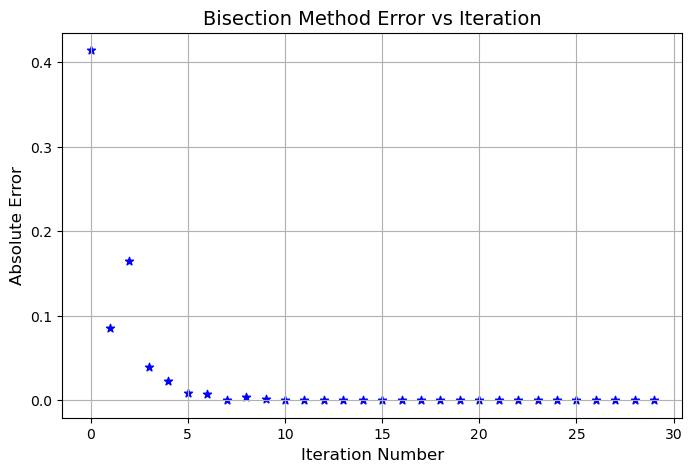

In [2]:
from Chapter_2_Figures import create_figure_2_2

create_figure_2_2()

2. Without Theorem 2.2 it would be rather hard to tell what the exact behavior is in the exponential plot above. We know from Theorem 2.2 that the error will divide by 2 at every step, so if we instead plot the base- 2 logarithm of the absolute error against the iteration number we should see a linear trend as shown in Figure 2.3. There will be times later in this course where we won't have a nice theorem like Theorem 2.2 and instead we will need to deduce the relationship from plots like these.

- The trend is linear since logarithms and exponential functions are inverses. Hence, applying a logarithm to an exponential will give a linear function.
- The slope of the resulting linear function should be -1 in this case since we are dividing by 1 power of 2 each iteration. Visually verify that the slope in the plot below follows this trend (the red dashed line in the plot is shown to help you see the slope).

**Figure 2.3: Iteration number vs the base-2 logarithm of the absolute error. Notice the slope of -1 indicating that the error is divided by 1 factor of 2 at each step of the algorithm.**


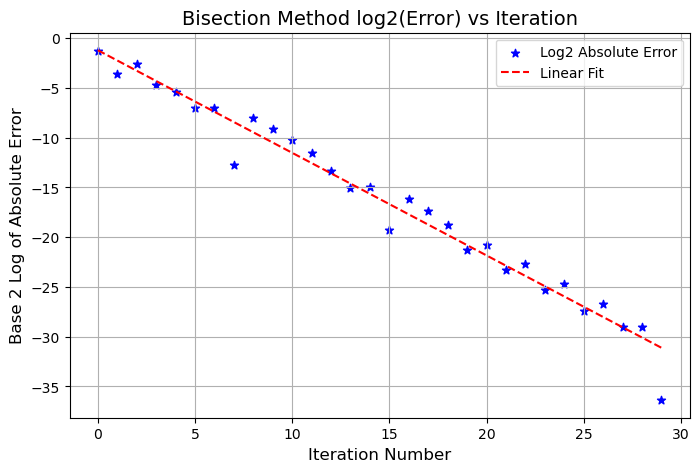

In [3]:
from Chapter_2_Figures import create_figure_2_3

create_figure_2_3()



3. Another plot that numerical analysts use quite frequently for determining how an algorithm is behaving as it progresses is described by the following bullets:

- The horizontal axis is the absolute error at iteration $k$.
- The vertical axis is the absolute error at iteration $k+1$.

See Figure 2.4 below, but this type of plot takes a bit of explaining the first time you see it. Start on the right-hand side of the plot where the error is the largest (this will be where the algorithm starts). The coordinates of the first point are interpreted as:
(absolute error at step 1, absolute error at step 2).
The coordinates of the second point are interpreted as:
(absolute error at step 2, absolute error at step 3).
Etc. Examining the slope of the trend line in this plot shows how we expect the error to progress from step to step. The slope appears to be about 1 in the plot below and the intercept appears to be about -1 . In this case we used a base- 2 logarithm for each axis so we have just empirically shown that

$$
\log _{2}(\text { absolute error at step } k+1) \approx 1 \cdot \log _{2}(\text { absolute error at step } k)-1
$$

Rearranging the algebra a bit we see that this linear relationship turns into

$$
\frac{\text { absolute error at step } k+1}{\text { absolute error at step } k} \approx \frac{1}{2}
$$

(You should stop now and do this algebra.) Rearranging a bit more we get

$$
(\text { absolute error at step } k+1)=\frac{1}{2}(\text { absolute error at step } k)
$$

exactly as expected!! Pause and ponder this result for a second - we just empirically verified the convergence rate for the bisection method just by examining the plot below!! That's what makes these types of plots so powerful!

**Figure 2.4: The base-2 logarithm of the absolute error at iteration $k$ vs the base-2 logarithm of the absolute error at iteration $k+1$.**


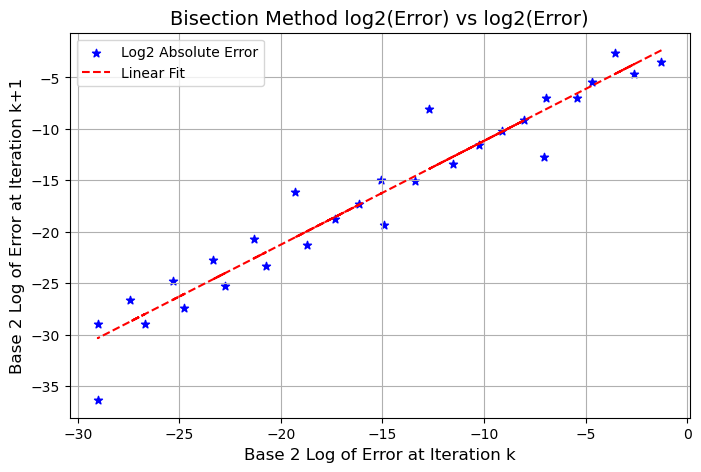

In [ ]:
from Chapter_2_Figures import create_figure_2_4
create_figure_2_4()




d. The final plot that we will make in analyzing the bisection method is the same as the plot that we just made but with the base-10 logarithm instead. See Figure 2.5. In future algorithms we will not know that the error decreases by a factor of 2 so instead we will just try the base- 10 logarithm. We will be able to extract the exact same information from this plot. The primary advantage of this last plot is that we can see how the order of magnitude (the power of 10) for the error progresses as the algorithm steps forward. Notice that for every order of magnitude iteration $k$ decreases, iteration $k+1$ decreases by one order of magnitude. That is, the slope of the best fit line in Figure 2.5 is approximately 1. Discuss what this means about how the error in the bisection method behaves as the iterations progress.

**Figure 2.5: The base-10 logarithm of the absolute error at iteration $k$ vs the base-10 logarithm of the absolute error at iteration $k+1$.**


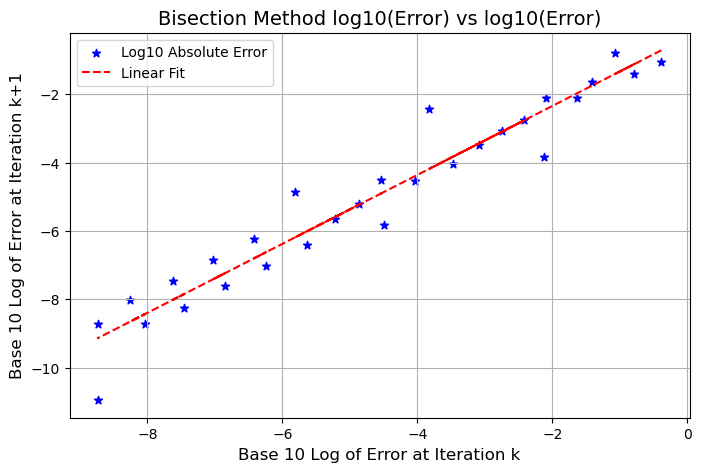

In [ ]:
from Chapter_2_Figures import create_figure_2_5
create_figure_2_5()

--- 

### Exercise 2.20. 

Carefully read and discuss all of the details of the previous example and plots. Then create plots similar to this example to solve an equation to which you know the exact solution to. You should see the same basic behavior based on the theorem that you proved in Exercise 2.17. If you don't see the same basic behavior then something has gone wrong.

Hints: You will need to create a modified bisection method function which returns all of the iterations instead of just the final root.
If the logarithms of your absolute errors are in a Python list called error then a command like plt.plot (error [:-1], error [1:],'b*') will plot the $(k+1)^{s t}$ absolute error against the $k^{t h}$ absolute error.
If you want the actual slope and intercept of the trend line then you can use `m, b=np.polyfit(error[:-1], error[1:], deg=1)`.

---


### 2.3 The Regula Falsi Method

### 2.3.1 Intuition and Implementation

The bisection method is one of many methods for performing root finding on a continuous function. The next algorithm takes a slightly different approach.

---


### Exercise 2.21. 

In the Bisection Method, we always used the midpoint of the interval as the next approximation of the root of the function $f(x)$ on the interval $[a, b]$. The three pictures in Figure 2.6 show the same function with three different choices for $a$ and $b$. Which one will take fewer Bisection-steps to find the root? Which one will take more steps? Explain your reasoning.
(Note: The root in question is marked with the green star and the initial interval is marked with the red circles.)

**Figure 2.6: In the bisection method you get to choose the starting interval however you like. That choice will make an impact on how fast the algorithm converges to the approximate root.**


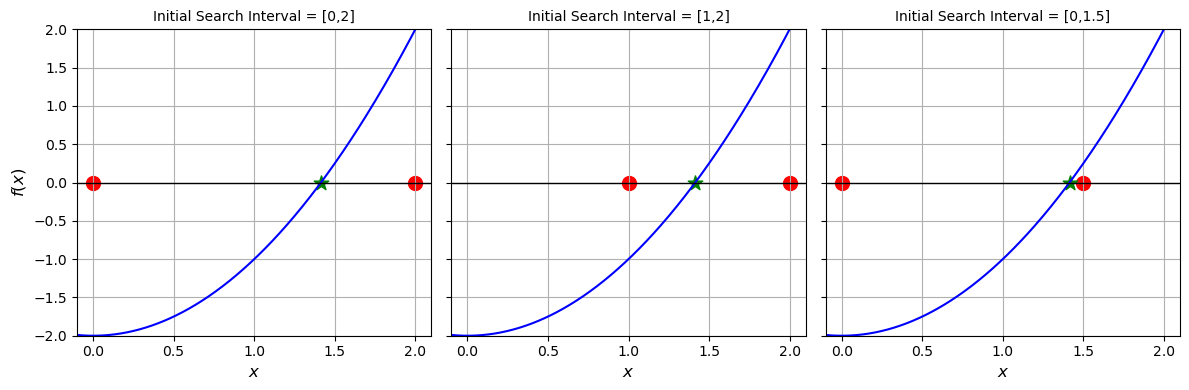

In [6]:
from Chapter_2_Figures import create_figure_2_6
create_figure_2_6()


---

### Exercise 2.22. 

Now let's modify the Bisection Method approach. Instead of always using the midpoint (which as you saw in the previous problem could take a little while to converge) let's draw a line between the endpoints and use the $x$-intercept as the updated guess. If we use this method can we improve the speed of convergence on any of the choices of $a$ and $b$ for this function? Which one will now likely take the fewest steps to converge? Figure 2.7 shows three different starting intervals marked in red with the new guess marked as a black X.

**Figure 2.7: In hopes of improving the bisection method we instead propose that we choose the intersection of a line between the endpoints of the interval and the $x$ axis. The intersection (marked with a black X) would be the next approximation instead of the midpoint of the interval.**


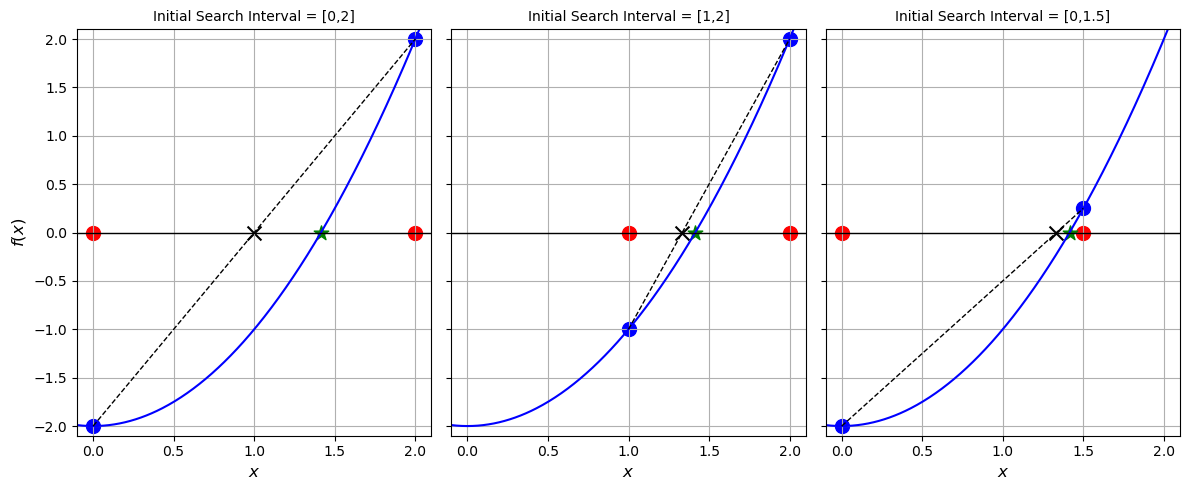

In [7]:
from Chapter_2_Figures import create_figure_2_7
create_figure_2_7()


---

The algorithm that you played with graphically in the previous problem is known as the Regula Falsi (false position) algorithm. It is really just a minor tweak on the Bisection method. After all, the algorithm is still designed to use the Intermediate Value Theorem and to iteratively zero in on the root of the function on the given interval. This time, instead of picking the midpoint of the interval that contains the root we draw a line between the function values at either end of the interval and then use the intersection of that line with the $x$ axis as the new approximation of the root. As you can see in Figure 2.7 you might actually converge to the approximate root much faster this way (like with the far right plot) or you might gain very little performance (like the far left plot).

---

### Exercise 2.23. (The Regula Falsi Method) 

Assume that $f(x)$ is continuous on the interval $[a, b]$. To make iterative approximations of the solutions to the equation $f(x)=0$, do the following:

1. Check to see if $f(a)$ and $f(b)$ have opposite signs so that the intermediate value theorem guarantees a root on the interval.
2. We want to write the equation of the line connecting the points $(a, f(a))$ and $(b, f(b))$.

- What is the slope of this line?

$$
m=
$$

$\qquad$

- Using the point-slope form of a line, $y-y_{1}=m\left(x-x_{1}\right)$, what is the
equation of the line?

$$
y-\quad=\quad . \quad\left(x-\quad{ }_{\square}\right)
$$

3. Find the $x$ intercept of the linear function that you wrote in the previous step by setting the $y$ to zero and solving for $x$. Call this point $x=c$.

$$
c=
$$

$\qquad$
Hint: The $x$ intercept occurs with $y=0$.
4. Just as we did with the bisection method, compare the signs of $f(a)$ vs $f(c)$ and $f(b)$ vs $f(c)$. Replace one of the endpoints with $c$. Which one do you replace and why?
5. Repeat steps 2-4, and stop when $f(c)$ is close enough to zero.

---



### Exercise 2.24. 

Draw a picture of what the Regula Falsi method does to approximate a root.



---

### Exercise 2.25. 

Give sketches of functions where the Regula Falsi method will perform faster than the Bisection method and visa versa. Justify your thinking with several pictures and be prepared to defend your answers.



---

### Exercise 2.26. 

Create a new Python function called regulafalsi and write comments giving pseudo-code for the Regula-Falsi method. Remember that starting with pseudo-code is always the best way to start your coding. Write comments that give direction to the code that you're about to write. It is a trap to try and write actual code without any pseudo-code to give you a backbone for the function.



----

### Exercise 2.27. 

Use your pseudo-code to create a Python function that implements the Regula Falsi method. Write a test script that verifies that your function works properly. Your function should accept a Python function or a Lambda function as input along with an initial lower bound, an initial upper bound, and an optional error tolerance. The output should be only 1 single number: the approximate root.




---

### 2.3.2 Analysis

In this subsection we will lean on the fact that we developed a bunch of analysis tools in the Analysis section of the Bisection Method. You may want to go back to that section first and take another look at the plots and tools that we built.

Exercise 2.28. In this problem we are going to solve the equation $x^{2}-2=0$ since we know that the exact answer is $x=\sqrt{2}$. You will need to start by modifying your regulafalsi function from Exercise 2.26 so that it returns all of the iterations instead of just the root.
a. Start with the interval $[0,2]$ and solve the equation $x^{2}-2=0$ with the Regula-Falsi method.
i. Find the absolute error between each iteration and the exact answer $x=\sqrt{2}$.
ii. Make a plot of the base-10 logarithm of the absolute error at step $k$ against the base-10 logarithm of the absolute error at step $k+1$. This plot will be very similar to Figure 2.5.
iii. Approximate the slope and intercept of the linear trend in the plot.

$$
\begin{aligned}
& \log _{10}(\text { abs error at step } k+1) \\
& \quad=\quad \ldots \quad \log _{10}(\text { abs error at step } k+1)+
\end{aligned}
$$

iv. Based on the work that we did in Example 2.1 estimate the rate of convergence of the Regula-Falsi method.
b. Repeat part (a) with the initial interval $[1,2]$.
c. Repeat part (a) with the initial interval [0,1.5].

Exercise 2.29. (Bisection vs Regula Falsi) Pick a somewhat non-trivial equation where you know the exact answer. Then pick several different starting intervals where you can use both the Bisection Method and the Regula-Falsi Method. Try picking the starting intervals so that some of them converge faster using the Bisection Method and some will converge faster with the Regula-Falsi Method. Show your results with error plots similar to the previous exercise.

Exercise 2.30. Is the Regula-Falsi always better than the bisection method at finding an approximate root for a continuous function that has a known root in a closed interval? Why / why not? Discuss.

### 2.4 Newton's Method

In the previous two sections we studied techniques for solving equations that required very little sophisticated math. The bisection and regula-falsi methods work very well, but as we'll find in this section we can actually greatly improve the quality of the root-finding algorithms by leveraging some Calculus.

### 2.4.1 Intuition and Implementation

Exercise 2.31. We will start this section with a reminder from Differential Calculus.
a. If $f(x)$ is a differentiable function at $x=x_{0}$ then the slope of the tangent line to $f(x)$ at $x=x_{0}$ is

Slope of Tangent Line to $f(x)$ at $x=x_{0}$ is $m=$ $\qquad$
b. From algebra, the point-slope form of a line is

$$
y-y_{0}=m\left(x-x_{0}\right)
$$

where $\left(x_{0}, y_{0}\right)$ is a point on the line and $m$ is the slope.
c. If $f(x)$ is a differential function at $x=x_{0}$ then the equation of the tangent to $f(x)$ at that point is
$y-$ $\qquad$ $=$ $\qquad$ - $(x-$ $\qquad$
d. If we rearrange the answer from part (c) we get

$$
y=\ldots+\ldots \quad(x-\square)
$$

The $x$-intercept of a function is where the function is 0 . Root finding is really the process of finding the $x$-intercept of the function. If the function is complicated (e.g. highly nonlinear or doesn't lend itself to traditional by-hand techniques) then we can approximate the $x$-intercept by creating a Taylor Series approximation of the function at a nearby point and then finding the $x$-intercept of that simpler Taylor Series. The simplest non-trivial Taylor Series is a linear function - a tangent line!

Exercise 2.32. A tangent line approximation to a function $f(x)$ near a point $x=x_{0}$ is

$$
y=f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)
$$

Set $y$ to zero and solve for $x$ to find the $x$-intercept of the tangent line.
$x$-intercept of tangent line is $x=$ $\qquad$

Exercise 2.33. Now let's use the computations you did in the previous exercises to look at an algorithm for approximating the root of a function. In the following sequence of plots we do the following algorithm:

- Given a value of $x$ that is a decent approximation of the root, draw a tangent line to $f(x)$ at that point.
- Find where the tangent line intersects the $x$ axis.
- Use this intersection as the new $x$ value and repeat.

The first step has been shown for you. Take a couple more steps graphically. Does the algorithm appear to converge to the root? Do you think that this will generally take more or fewer steps than the Bisection Method?
![](https://cdn.mathpix.com/cropped/2025_02_09_2e7e850ce08497a6e4c5g-19.jpg?height=549&width=1091&top_left_y=986&top_left_x=422)

Figure 2.8: Using successive tangent line approximations to find the root of a function

Exercise 2.34. If we had started at $x=0$ in the previous problem what would have happened? Would this initial guess have worked to eventually approximate the root?

Exercise 2.35. Make a complete list of what you must know about the function $f(x)$ for the previous algorithm to work?

The algorithm that we just played with is known as Newton's Method. The method was originally proposed by Isaac Newton, and later modified by Joseph Raphson, for approximating roots of the equation $f(x)=0$. It should be clear that Newton's method requires the existence of the first derivative so we are asking a bit more of our functions than we were before. In Bisection and Regula

Falsi we only asked that the functions be continuous, now we're asking that they be differentiable. Stop and think for a moment ... why is this a more restrictive thing to ask for of the function $f(x)$ ?

Exercise 2.36. (Newton's Method) The Newton-Raphson method for solving equations can be described as follows:

1. Check that $f$ is differentiable on a given domain and find a way to guarantee that $f$ has a root on that domain (this step happens by hand, not on the computer).
2. Pick a starting point $x_{0}$ in the domain
3. We want to write the equation of a tangent line to $f$ at the point $\left(x_{0}, f\left(x_{0}\right)\right)$.
i. What is the slope of the tangent line to the function $f(x)$ at the point $\left(x_{0}, f\left(x_{0}\right)\right)$ ?

$$
m_{\text {tangent }}=
$$

ii. Using the point-slope form of a line, $y-y_{1}=m\left(x-x_{1}\right)$, write the equation of the tangent line to $f(x)$ at the point $\left(x_{0}, f\left(x_{0}\right)\right)$.

$$
y-\quad=\quad . \quad \cdot\left(x-\quad{ }_{\square}\right)
$$

4. Find the $x$ intercept of the equation of the tangent line by setting $y=0$ and solving for $x$. Call this new point $x_{1}$.

$$
x_{1}=
$$

$\qquad$
5. Now iterate the process by replacing the labels " $x_{1}$ " and " $x_{0}$ " in the previous step with $x_{n+1}$ and $x_{n}$ respectively.

$$
x_{n+1}=
$$

6. Iterate step 5 until $f\left(x_{n}\right)$ is close to zero.

Exercise 2.37. Draw a picture of what Newton's method does graphically.

Exercise 2.38. Create a new Python function called newton() and write comments giving pseudo-code for Newton's method. Your function needs to accept a Python function for $f(x)$, a Python function for $f^{\prime}(x)$, an initial guess, and an optional error tolerance. You don't need to set aside any code for calculating the derivative.

Exercise 2.39. Using your pseudocode from the previous problem, write the full newton() function. The only output should be the solution to the equation that you are solving. Write a test script to verify that your Newton's method code indeed works.

### 2.4.2 Analysis

There are several ways in which Newton's Method will behave unexpectedly - or downright fail. Some of these issues can be foreseen by examining the Newton iteration formula

$$
x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)}{f^{\prime}\left(x_{n}\right)}
$$

Some of the failures that we'll see are a little more surprising. Also in this section we will look at the convergence rate of Newton's Method and we will show that we can greatly outperform the Bisection and Regula-Falsi methods.

Exercise 2.40. There are several reasons why Newton's method could fail. Work with your partners to come up with a list of reasons. Support each of your reasons with a sketch or an example.

Exercise 2.41. One of the failures of Newton's Method is that it requires a division by $f^{\prime}\left(x_{n}\right)$. If $f^{\prime}\left(x_{n}\right)$ is zero then the algorithm completely fails. Go back to your Python function and put an if statement in the function that catches instances when Newton's Method fails in this way.

Exercise 2.42. An interesting failure can occur with Newton's Method that you might not initially expect. Consider the function $f(x)=x^{3}-2 x+2$. This function has a root near $x=-1.77$. Fill in the table below and draw the tangent lines on the figure for approximating the solution to $f(x)=0$ with a starting point of $x=0$.

| $n$ | $x_{n}$ | $f\left(x_{n}\right)$ |
| :--- | :--- | :--- |
| 0 | $x_{0}=0$ | $f\left(x_{0}\right)=2$ |
| 1 | $x_{1}=0-\frac{f\left(x_{0}\right)}{f^{\prime}\left(x_{0}\right)}=1$ | $f\left(x_{1}\right)=1$ |
| 2 | $x_{2}=1-\frac{f\left(x_{1}\right)}{f^{\prime}\left(x_{1}\right)}=$ | $f\left(x_{2}\right)=$ |
| 3 | $x_{3}=$ | $f\left(x_{3}\right)=$ |
| 4 | $x_{4}=$ | $f\left(x_{4}\right)=$ |
| $\vdots$ | $\vdots$ | $\vdots$ |

![](https://cdn.mathpix.com/cropped/2025_02_09_2e7e850ce08497a6e4c5g-22.jpg?height=396&width=605&top_left_y=428&top_left_x=852)

Figure 2.9: An interesting Newton's Method failure.

Exercise 2.43. Now let's consider the function $f(x)=\sqrt[3]{x}$. This function has a root $x=0$. Furthermore, it is differentiable everywhere except at $x=0$ since

$$
f^{\prime}(x)=\frac{1}{3} x^{-2 / 3}=\frac{1}{3 x^{2 / 3}} .
$$

The point of this problem is to show what can happen when the point of non-differentiability is precisely the point that you're looking for.
a. Fill in the table of iterations starting at $x=-1$, draw the tangent lines on the plot, and make a general observation of what is happening with the Newton iterations.

| $n$ | $x_{n}$ | $f\left(x_{n}\right)$ |
| :--- | :--- | :--- |
| 0 | $x_{0}=-1$ | $f\left(x_{0}\right)=-1$ |
| 1 | $x_{1}=-1-\frac{f(-1)}{f^{\prime}(-1)}=$ | $f\left(x_{1}\right)=$ |
| 2 |  |  |
| 3 |  |  |
| 4 |  | $\vdots$ |
| $\vdots$ | $\vdots$ |  |

b. Now let's look at the Newton iteration in a bit more detail. Since $f(x)=$ $x^{1 / 3}$ and $f^{\prime}(x)=\frac{1}{3} x^{-2 / 3}$ the Newton iteration can be simplified as

$$
x_{n+1}=x_{n}-\frac{x^{1 / 3}}{\left(\frac{1}{3} x^{-2 / 3}\right)}=x_{n}-3 \frac{x^{1 / 3}}{x^{-2 / 3}}=x_{n}-3 x_{n}=-2 x_{n} .
$$

What does this tell us about the Newton iterations?
Hint: You should have found the exact same thing in the numerical experiment in part (a).
c. Was there anything special about the starting point $x_{0}=-1$ ? Will this problem exist for every starting point?
![](https://cdn.mathpix.com/cropped/2025_02_09_2e7e850ce08497a6e4c5g-23.jpg?height=392&width=597&top_left_y=430&top_left_x=669)

Figure 2.10: Another surprising Newton's Method failure.

Exercise 2.44. Repeat the previous exercise with the function $f(x)=x^{3}-5 x$ with the starting point $x_{0}=-1$.
![](https://cdn.mathpix.com/cropped/2025_02_09_2e7e850ce08497a6e4c5g-23.jpg?height=389&width=595&top_left_y=1123&top_left_x=673)

Figure 2.11: Another surprising Newton's Method failure.

Exercise 2.45. Newton's Method is known to have a quadratic convergence rate. This means that there is some constant $C$ such that

$$
\left|x_{k+1}-x_{*}\right| \leq C\left|x_{k}-x_{*}\right|^{2}
$$

where $x_{*}$ is the root that we're hunting for.
The quadratic convergence implies that if we plot the error in the new iterate on the $y$-axis and the error in the old iterate on the $x$ axis of a log-log plot then we will see a constant slope of 2 . To see this we can take the $\log$ (base 10) of both sides of the previous equation to get

$$
\log \left(\left|x_{k+1}-x_{*}\right|\right)=\log (C)+2 \log \left(\left|x_{k}-x_{*}\right|\right)
$$

and we see that this is a linear function (on a log-log plot) and the slope is 2. We created plots like this back in Example 2.1.

We are going to create an error plot just like what we just described.
a. Pick an equation where you know the solution.
b. Create the error plot with $\left|x_{k}-x_{*}\right|$ on the horizontal axis and $\left|x_{k+1}-x_{*}\right|$ on the vertical axis
c. Demonstrate that this plot has a slope of 2 .
d. Give a thorough explanation for how to interpret the plot that you just made.
e. When solving an equation with Newton's method Joe found that the absolute error at iteration 1 of the process was 0.15 . Based on the fact that Newton's method is a second order method this means that the absolute error at step 2 will be less than or equal to some constant times $0.15^{2}=0.0225$. Similarly, the error at step 3 will be less than or equal to some scalar multiple of $0.0025^{2}=0.00050625$. What would Joe's expected error be bounded by for the fourth iteration, fifth iteration, etc?

### 2.5 The Secant Method

### 2.5.1 Intuition and Implementation

Newton's Method has second-order (quadratic) convergence and, as such, will perform faster than the Bisection and Regula-Falsi methods. However, Newton's Method requires that you have a function and a derivative of that function. The conundrum here is that sometimes the derivative is cumbersome or impossible to obtain but you still want to have the great quadratic convergence exhibited by Newton's method.
Recall that Newton's method is

$$
x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)}{f^{\prime}\left(x_{n}\right)}
$$

If we replace $f^{\prime}\left(x_{n}\right)$ with an approximation of the derivative then we may have a method that is close to Newton's method in terms of convergence rate but is less troublesome to compute. Any method that replaces the derivative in Newton's method with an approximation is called a Quasi-Newton Method. The first, and most obvious, way to approximate the derivative is just to use the slope of a secant line instead of the slope a tangent line in the Newton iteration. If we choose two starting points that are quite close to each other then the slope of the secant line through those points will be approximately the same as the slope of the tangent line.

Exercise 2.46. (The Secant Method) Assume that $f(x)$ is continuous and we wish to solve $f(x)=0$ for $x$.

1. Determine if there is a root near an arbitrary starting point $x_{0}$. How might you do that?
2. Pick a second starting point near $x_{0}$. Call this second starting point $x_{1}$. Note well that the points $x_{0}$ and $x_{1}$ should be close to each other. Why? (The choice here is different than for the Bisection and Regula Falsi methods. We are not choosing the left- and right- sides of an interval surrounding the root.)
3. Use the backward difference

$$
f^{\prime}\left(x_{n}\right) \approx \frac{f\left(x_{n}\right)-f\left(x_{n-1}\right)}{x_{n}-x_{n-1}}
$$

to approximate the derivative of $f$ at $x_{n}$. Discuss why this approximates the derivative.
4. Perform the Newton-type iteration

$$
x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)}{\left(\frac{f\left(x_{n}\right)-f\left(x_{n-1}\right)}{x_{n}-x_{n-1}}\right)}
$$

until $f\left(x_{n}\right)$ is close enough to zero. Notice that the new iteration simplifies to

$$
x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)\left(x_{n}-x_{n-1}\right)}{f\left(x_{n}\right)-f\left(x_{n-1}\right)} .
$$

Exercise 2.47. Draw several pictures showing what the Secant method does pictorially.

Exercise 2.48. Write pseudo-code to outline how you will implement the Secant Method.

Exercise 2.49. Write Python code for solving equations of the form $f(x)=0$ with the Secant method. Your function should accept a Python function, two starting points, and an optional error tolerance. Also write a test script that clearly shows that your code is working.

### 2.5.2 Analysis

Up to this point we have done analysis work on the Bisection Method, the Regula-Falsi Method, and Newton's Method. We have found that the methods are first order, first order, and second order respectively. We end this chapter by doing the same for the Secant Method.

Exercise 2.50. Choose a non-trivial equation for which you know the solution and write a script to empirically determine the convergence rate of the Secant method.

### 2.6 Exercises

### 2.6.1 Algorithm Summaries

The following four problems are meant to have you re-build each of the algorithms that we developed in this chapter. Write all of the mathematical details completely and clearly. Don't just write "how" the method works, but give all of the mathematical details for "why" it works.

Exercise 2.51. Let $f(x)$ be a continuous function on the interval $[a, b]$ where $f(a) \cdot f(b)<0$. Clearly give all of the mathematical details for how the Bisection Method approximates the root of the function $f(x)$ in the interval $[a, b]$.

Exercise 2.52. Let $f(x)$ be a continuous function on the interval $[a, b]$ where $f(a) \cdot f(b)<0$. Clearly give all of the mathematical details for how the Regula Falsi Method approximates the root of the function $f(x)$ in the interval $[a, b]$.

Exercise 2.53. Let $f(x)$ be a differentiable function with a root near $x=$ $x_{0}$. Clearly give all of the mathematical details for how Newton's Method approximates the root of the function $f(x)$.

Exercise 2.54. Let $f(x)$ be a continuous function with a root near $x=$ $x_{0}$. Clearly give all of the mathematical details for how the Secant Method approximates the root of the function $f(x)$.

### 2.6.2 Applying What You've Learned

Exercise 2.55. How many iterations of the bisection method are necessary to approximate $\sqrt{3}$ to within $10^{-3}, 10^{-4}, \ldots, 10^{-15}$ using the initial interval $[a, b]=[0,2]$ ? See Theorem 2.2.

Exercise 2.56. Refer back to Example 2.1 and demonstrate that you get the same results by solving the problem $x^{3}-3=0$. Generate versions of all of the plots from the Example and give thorough descriptions of what you learn from each plot.

Exercise 2.57. In this problem you will demonstrate that all of your root finding codes work. At the beginning of this chapter we proposed the equation solving problem

$$
3 \sin (x)+9=x^{2}-\cos (x)
$$

Write a script that calls upon your Bisection, Regula Falsi, Newton, and Secant methods one at a time to find the positive solution to this equation. Your script needs to output the solutions in a clear and readable way so you can tell which answer can from which root finding algorithm.

Exercise 2.58. A root-finding method has a convergence rate of order $M$ if there is a constant $C$ such that

$$
\left|x_{k+1}-x_{*}\right| \leq C\left|x_{k}-x_{*}\right|^{M}
$$

Here, $x_{*}$ is the exact root, $x_{k}$ is the $k^{t h}$ iteration of the root finding technique, and $x_{k+1}$ is the $(k+1)^{s t}$ iteration of the root finding technique.
a. If we consider the equation

$$
\left|x_{k+1}-x_{*}\right| \leq C\left|x_{k}-x_{*}\right|^{M}
$$

and take the logarithm (base 10) of both sides then we get

$$
\log \left(\left|x_{k+1}-x_{*}\right|\right) \leq
$$

b. In part (a) you should have found that the $\log$ of new error is a linear function of the log of the old error. What is the slope of this linear function on a log-log plot?
c. In the plots below you will see six different log-log plots of the new error to the old error for different root finding techniques. What is the order of the approximate convergence rate for each of these methods?
d. In your own words, what does it mean for a root finding method to have a "first order convergence rate?" "Second order convergence rate?" etc.

Exercise 2.59. Shelby started using Newton's method to solve a root-finding problem. To test her code she was using an equation for which she new the solution. Given the starting point the absolute error after one step of Newton's method was $\left|x_{1}-x_{*}\right|=0.2$. What is the approximate expected error at step 2 ? What about at step 3? Step 4? Defend your answers by fully describing your thought process.
![](https://cdn.mathpix.com/cropped/2025_02_09_2e7e850ce08497a6e4c5g-29.jpg?height=779&width=1151&top_left_y=429&top_left_x=384)

Figure 2.12: Six Error Plots

Exercise 2.60. There are MANY other root finding techniques beyond the four that we have studied thus far. We can build these methods using Taylor Series as follows:

Near $x=x_{0}$ the function $f(x)$ is approximated by the Taylor Series

$$
f(x) \approx y=f\left(x_{0}\right)+\sum_{n=1}^{N} \frac{f^{(n)}\left(x_{0}\right)}{n!}\left(x-x_{0}\right)^{n}
$$

where $N$ is a positive integer. In a root-finding algorithm we set $y$ to zero to find the root of the approximation function. The root of this function should be close to the actual root that we're looking for. Therefore, to find the next iterate we solve the equation

$$
0=f\left(x_{0}\right)+\sum_{n=1}^{N} \frac{f^{(n)}\left(x_{0}\right)}{n!}\left(x-x_{0}\right)^{n}
$$

for $x$. For example, if $N=1$ then we need to solve $0=f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)$ for $x$. In doing so we get $x=x_{0}-f\left(x_{0}\right) / f^{\prime}\left(x_{0}\right)$. This is exactly Newton's method. If $N=2$ then we need to solve

$$
0=f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)+\frac{f^{\prime \prime}\left(x_{0}\right)}{2!}\left(x-x_{0}\right)^{2}
$$

for $x$.
a. Solve for $x$ in the case that $N=2$. Then write a Python function that implements this root-finding method.
b. Demonstrate that your code from part (a) is indeed working by solving several problems where you know the exact solution.
c. Show several plots that estimates the order of the method from part (a). That is, create a log-log plot of the successive errors for several different equation-solving problems.
d. What are the pro's and con's to using this new method?

Exercise 2.61. (modified from [5]) An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is

$$
s(t)=s_{0}-\frac{m g}{k} t+\frac{m^{2} g}{k^{2}}\left(1-e^{-k t / m}\right)
$$

where $m$ is the mass measured in $\mathrm{kg}, g$ is gravity measured in meters per second per second, $s_{0}$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.
a. What are the units of the parameter $k$ ?
b. If $m=1 \mathrm{~kg}, g=9.8 \mathrm{~m} / \mathrm{s}^{2}, k=0.1$, and $s_{0}=100 \mathrm{~m}$ how long will it take for the object to hit the ground? Find your answer to within 0.01 seconds.
c. The value of $k$ depends on the aerodynamics of the object and might be challenging to measure. We want to perform a sensitivity analysis on your answer to part (b) subject to small measurement errors in $k$. If the value of $k$ is only known to within $10 \%$ then what are your estimates of when the object will hit the ground?

Exercise 2.62. Can the Bisection Method, Regula Falsi Method, or Newton's Method be used to find the roots of the function $f(x)=\cos (x)+1$ ? Explain why or why not for each technique?

Exercise 2.63. In Single Variable Calculus you studied methods for finding local and global extrema of functions. You likely recall that part of the process is to set the first derivative to zero and to solve for the independent variable (remind yourself why you're doing this). The trouble with this process is that it may be very very challenging to solve by hand. This is a perfect place for Newton's method or any other root finding techinque!
Find the local extrema for the function $f(x)=x^{3}(x-3)(x-6)^{4}$ using numerical techniques where appropriate.

Exercise 2.64. A fixed point of a function $f(x)$ is a point that solves the equation $f(x)=x$. Fixed points are interesting in iterative processes since fixed points don't change under repeated application of the function $f$.

For example, consider the function $f(x)=x^{2}-6$. The fixed points of $f(x)$ can be found by solving the equation $x^{2}-6=x$ which, when simplified algebraically, is $x^{2}-x-6=0$. Factoring the left-hand side gives $(x-3)(x+2)=0$ which implies that $x=3$ and $x=-2$ are fixed points for this function. That is, $f(3)=3$ and $f(-2)=-2$. Notice, however, that finding fixed points is identical to a root finding problem.
a. Use a numerical root-finding algorithm to find the fixed points of the function $f(x)=x^{2}-6$ on the interval $[0, \infty)$.
b. Find the fixed points of the function $f(x)=\sqrt{\frac{8}{x+6}}$.

Exercise 2.65. (scipy.optimize.fsolve()) The scipy library in Python has many built-in numerical analysis routines much like the ones that we have built in this chapter. Of particular interest to the task of root finding is the fsolve command in the scipy.optimize library.
a. Go to the help documentation for scipy.optimize.fsolve and make yourself familiar with how to use the tool.
b. First solve the equation $x \sin (x)-\ln (x)=0$ for $x$ starting at $x_{0}=3$.
i. Make a plot of the function on the domain $[0,5]$ so you can eyeball the root before using the tool.
ii. Use the scipy.optimize.fsolve() command to approximate the root.
iii. Fully explain each of the outputs from the scipy.optimize.fsolve() command. You should use the fsolve() command with full_output=1 so you can see all of the solver diagnostics.
c. Demonstrate how to use fsolve() using any non-trivial nonlinear equation solving problem. Demonstrate what some of the options of fsolve() do.
d. The scipy.optimize.fsolve() command can also solve systems of equations (something we have not built algorithms for in this chapter). Consider the system of equations

$$
\begin{aligned}
& x_{0} \cos \left(x_{1}\right)=4 \\
& x_{0} x_{1}-x_{1}=5
\end{aligned}
$$

The following Python code allows you to use scipy.optimize.fsolve() so solve this system of nonlinear equations in much the same way as we did in part (b) of this problem. However, be aware that we need to think of x as a vector of $x$-values. Go through the code below and be sure that you understand every line of code.
e. Solve the system of nonlinear equations below using .fsolve().

$$
\begin{array}{r}
x^{2}-x y^{2}=2 \\
x y=2
\end{array}
$$

```
import numpy as np
from scipy.optimize import fsolve
def F(x):
    Output = [ x[0]*np.cos(x[1])-4 ]
    Output.append( x[0]*x[1] - x[1] - 5 )
    return Output
# Or alternately we could define the system as a lambda function
# with F = lambda x: [ x[0]*np.cos(x[1])-4 , x[0]*x[1]-x[1]-5 ]
fsolve(F,[6,1],full_output=1)
# Note: full_output gives the solver diagnostics
```


### 2.7 Projects

At the end of every chapter we propose a few projects related to the content in the preceding chapter(s). In this section we propose one ideas for a project related to numerical algebra. The projects in this book are meant to be open ended, to encourage creative mathematics, to push your coding skills, and to require you to write and communicate your mathematics. Take the time to read Appendix B before you write your final paper.

### 2.7.1 Basins of Attraction

Let $f(x)$ be a differentiable function with several roots. Given a starting $x$ value we should be able to apply Newton's Method to that starting point and we will converge to one of the roots (so long as you aren't in one of the special cases discussed earlier in the chapter). It stands to reason that starting points near each other should all end up at the same root, and for some functions this is true. However, it is not true in general.

A basin of attraction for a root is the set of $x$ values that converges to that root under Newton iterations. In this problem you will produce colored plots showing the basins of attraction for all of the following functions. Do this as follows:

- Find the actual roots of the function by hand (this should be easy on the functions below).
- Assign each of the roots a different color.
- Pick a starting point on the $x$ axis and use it to start Newton's Method.
- Color the starting point according to the root that it converges to.
- Repeat this process for many many starting points so you get a colored picture of the $x$ axis showing where the starting points converge to.

The set of points that are all the same color are called the basin of attraction for the root associated with that color. In Figure 2.13 there is an image of a sample basin of attraction image.

1. Create a basin on attraction image for the function $f(x)=(x-4)(x+1)$.
2. Create a basin on attraction image for the function $g(x)=(x-1)(x+3)$.
3. Create a basin on attraction image for the function $h(x)=(x-4)(x-$ 1) $(x+3)$.
4. Find a non-trivial single-variable function of your own that has an interesting picture of the basins of attraction. In your write up explain why you thought that this was an interesting function in terms of the basins of attraction.
![](https://cdn.mathpix.com/cropped/2025_02_09_2e7e850ce08497a6e4c5g-34.jpg?height=489&width=727&top_left_y=428&top_left_x=794)

Figure 2.13: A sample basin of attraction image for a cubic function.
5. Now for the fun part! Consider the function $f(z)=z^{3}-1$ where $z$ is a complex variable. That is, $z=x+i y$ where $i=\sqrt{-1}$. From the Fundamental Theorem of Algebra we know that there are three roots to this polynomial in the complex plane. In fact, we know that the roots are $z_{0}=1, z_{1}=\frac{1}{2}(-1+\sqrt{3} i)$, and $z_{2}=\frac{1}{2}(-1-\sqrt{3} i)$ (you should stop now and check that these three numbers are indeed roots of the polynomial $f(z))$. Your job is to build a picture of the basins of attraction for the three roots in the complex plane. This picture will naturally be two-dimensional since numbers in the complex plane are two dimensional (each has a real and an imaginary part). When you have your picture give a thorough write up of what you found.
6. Now pick your favorite complex-valued function and build a picture of the basins of attraction. Consider this an art project! See if you can come up with the prettiest basin of attraction picture.

### 2.7.2 Artillery

An artillery officer wishes to fire his cannon on an enemy brigade. He wants to know the angle to aim the cannon in order to strike the target. If we have control over the initial velocity of the cannon ball, $v_{0}$, and the angle of the cannon above horizontal, $\theta$, then the initial vertical component of the velocity of the ball is $v_{y}(0)=v_{0} \sin (\theta)$ and the initial horizontal component of the velocity of the ball is $v_{x}(0)=v_{0} \cos (\theta)$. In this problem we will assume the following:

- We will neglect air resistance ${ }^{1}$ so, for all time, the differential equations $v_{y}^{\prime}(t)=-g$ and $v_{x}^{\prime}(t)=0$ must both hold.

[^0]- We will assume that the position of the cannon is the origin of a coordinate system so $s_{x}(0)=0$ and $s_{y}(0)=0$.
- We will assume that the target is at position $\left(x_{*}, y_{*}\right)$ which you can measure accurately relative to the cannon's position. The landscape is relatively flat but $y_{*}$ could be a bit higher or a bit lower than the cannon's position.
Use the given information to write a nonlinear equation ${ }^{2}$ that relates $x_{*}, y_{*}$, $v_{0}, g$, and $\theta$. We know that $g=9.8 \mathrm{~m} / \mathrm{s}^{2}$ is constant and we will assume that the initial velocity can be adjusted between $v_{0}=100 \mathrm{~m} / \mathrm{s}$ and $v_{0}=150 \mathrm{~m} / \mathrm{s}$ in increments of $10 \mathrm{~m} / \mathrm{s}$. If we then are given a fixed value of $x_{*}$ and $y_{*}$ the only variable left to find in your equation is $\theta$. A numerical root-finding technique can then be applied to your equation to approximate the angle. Create several look up tables for the artillery officer so they can be given $v_{0}, x_{*}$, and $y_{*}$ and then use your tables to look up the angle at which to set the cannon. Be sure to indicate when a target is out of range.

Write a brief technical report detailing your methods. Support your work with appropriate mathematics and plots. Include your tables at the end of your report.

[^1]
[^0]:    ${ }^{1}$ Strictly speaking, neglecting air resistance is a poor assumption since a cannon ball moves fast enough that friction with the air plays a non-negligible role. However, the assumption of no air resistance greatly simplifies the math and makes this version of the problem more tractable. The second version of the artillery problem in Chapter 5 will look at the effects of air resistance on the cannon ball.

[^1]:    ${ }^{2}$ Hint: Symbolically work out the amount of time that it takes until the vertical position of the cannon ball reaches $y_{*}$. Then substitute that time into the horizontal position, and set the horizontal position equation to $x_{*}$.

